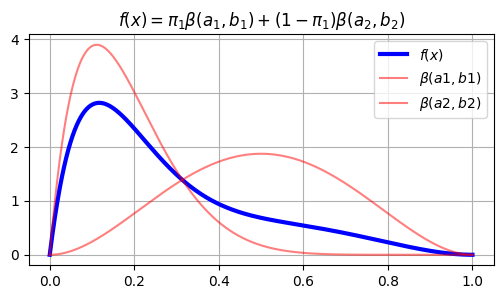

In [11]:
# draw a mixed beta distribution with beta(a1, b1) and beta(a2, b2)
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

a1, b1 = 2, 9
a2, b2 = 3, 3
pi1 = 0.7
f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)
y = f(x)
fig = plt.figure(figsize=[6, 3])
plt.plot(x, y, color="blue", linewidth=3, label="$f(x)$")
plt.grid()
plt.plot(x, beta.pdf(x, a1, b1), color="red", alpha=0.5, label="$\\beta(a1, b1)$")
plt.plot(x, beta.pdf(x, a2, b2), color="red", alpha=0.5, label="$\\beta(a2, b2)$")
plt.legend()
plt.title("$f(x) = \\pi_1 \\beta(a_1, b_1) + (1 - \\pi_1) \\beta(a_2, b_2)$")
plt.show()

Text(0.5, 1.0, '$f(x) = \\pi_1 \\beta(a_1, b_1) + (1 - \\pi_1) \\beta(a_2, b_2)$')

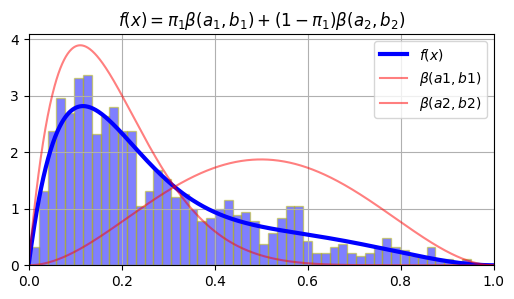

In [17]:
# generate random samples from the mixture
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt

a1, b1 = 2, 9
a2, b2 = 3, 3
pi1 = 0.7

# generate random samples from the mixture of two beta distributions
n = 1000
# n1 = int(n * pi1)
n1 = binom.rvs(n, pi1)
x1 = beta.rvs(a1, b1, size=n1)
x2 = beta.rvs(a2, b2, size=n - n1)
x_all = np.concatenate((x1, x2))

f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)
y = f(x)
fig = plt.figure(figsize=[6, 3])
plt.hist(x_all, density=True, bins=50, alpha=0.5, color='b', edgecolor='y')
plt.xlim(0, 1)
plt.plot(x, y, color="blue", linewidth=3, label="$f(x)$")
plt.grid()
plt.plot(x, beta.pdf(x, a1, b1), color="red", alpha=0.5, label="$\\beta(a1, b1)$")
plt.plot(x, beta.pdf(x, a2, b2), color="red", alpha=0.5, label="$\\beta(a2, b2)$")
plt.legend()
plt.title("$f(x) = \\pi_1 \\beta(a_1, b_1) + (1 - \\pi_1) \\beta(a_2, b_2)$")

[0.76159112 1.92756755 7.85196162 4.43257432 3.2811679 ]


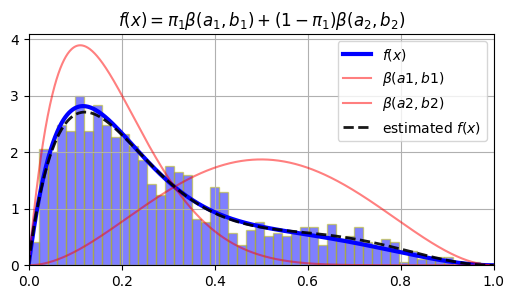

In [33]:
# compute MLE of the mixture of two beta distributions from the random samples
import numpy as np
from scipy.stats import beta
from scipy.optimize import minimize
import matplotlib.pyplot as plt

a1, b1 = 2, 9
a2, b2 = 3, 3
pi1 = 0.7

# generate random samples from the mixture of two beta distributions
n = 1000
# n1 = int(n * pi1)
n1 = binom.rvs(n, pi1)
x1 = beta.rvs(a1, b1, size=n1)
x2 = beta.rvs(a2, b2, size=n - n1)
x_all = np.concatenate((x1, x2))

f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)
y = f(x)
fig = plt.figure(figsize=[6, 3])
plt.hist(x_all, density=True, bins=50, alpha=0.5, color='b', edgecolor='y')
plt.xlim(0, 1)
plt.plot(x, y, color="blue", linewidth=3, label="$f(x)$")
plt.grid()
plt.plot(x, beta.pdf(x, a1, b1), color="red", alpha=0.5, label="$\\beta(a1, b1)$")
plt.plot(x, beta.pdf(x, a2, b2), color="red", alpha=0.5, label="$\\beta(a2, b2)$")
plt.title("$f(x) = \\pi_1 \\beta(a_1, b_1) + (1 - \\pi_1) \\beta(a_2, b_2)$")

# MLE of the mixture of two beta distributions
# negative log-likelihood function
def neg_log_likelihood(params):
    pi1, a1, b1, a2, b2 = params
    f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
    return -np.sum(np.log(f(x_all)))

# initial guess for the parameters
params0 = [0.5, 1, 6, 2, 2]
# add constraints for the parameters
bnd = ((0, 1), (0, None), (0, None), (0, None), (0, None))
result = minimize(neg_log_likelihood, params0, bounds=bnd)

# print the estimated parameters
print(result.x)

# plot the estimated distribution
pi1, a1, b1, a2, b2 = result.x
f_hat = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
y = f_hat(x)
plt.plot(x, y, color="black", linestyle="--", linewidth=2,\
            alpha=0.9, label="estimated $f(x)$")
plt.legend()
plt.show()